This are the angles for the controlled-U gates:
Controlled-U 0 >>>  Rotation-angle: 2 π/3
Controlled-U 1 >>>  Rotation-angle: 4 π/3
Controlled-U 2 >>>  Rotation-angle: 8 π/3
Controlled-U 3 >>>  Rotation-angle: 16 π/3
Controlled-U 4 >>>  Rotation-angle: 32 π/3
----------------------------------------------------------------------------------


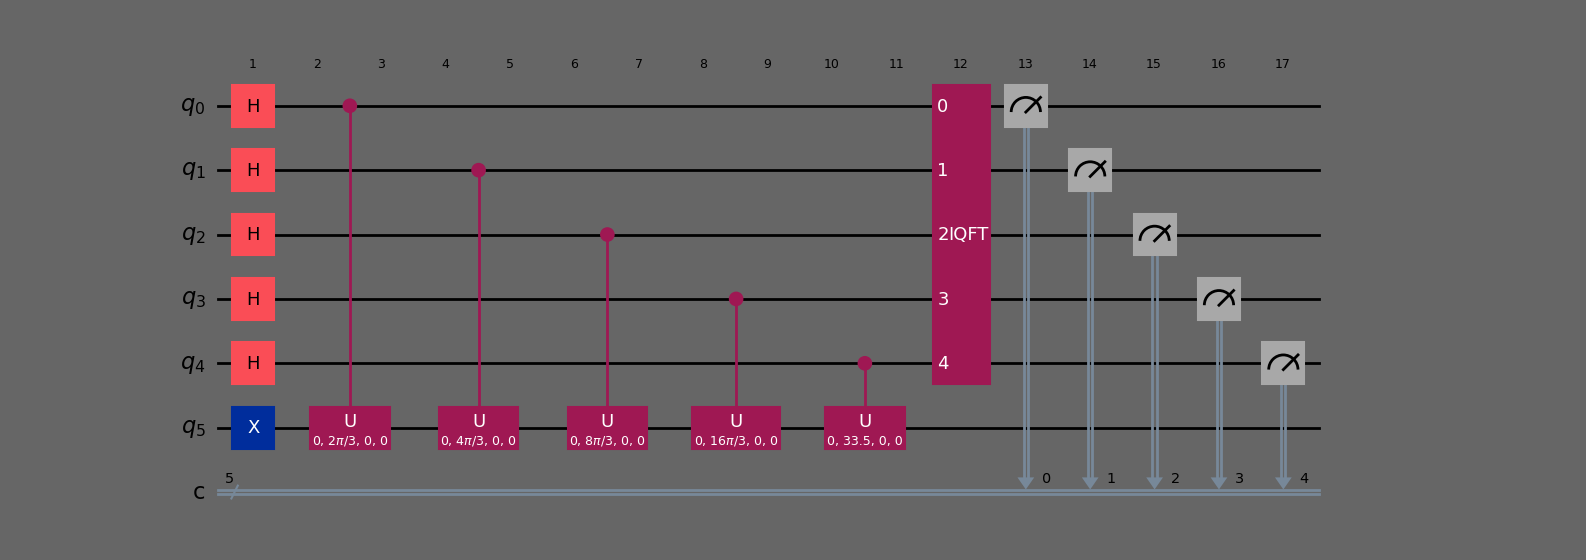

In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

# Five qubits for the counting register and one 
#qubit for the eigenstate |psi>
nQubits = 6

qpe = QuantumCircuit(nQubits, nQubits-1)

# H-Gates to control qubits:
for qubit in range(nQubits-1):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(nQubits-1)

# Controlled-U angles (theta) for qubits in descending order:
angle = 2*math.pi/3

print("This are the angles for the controlled-U gates:")
for control_qubit in range(nQubits-1):

    print("Controlled-U", control_qubit, ">>>  Rotation-angle:", 2**(control_qubit+1),  "\u03C0" "/3" )
    qpe.cu(0, angle, 0, 0, control_qubit, nQubits-1);
    angle *= 2

print("----------------------------------------------------------------------------------")

qpe.append(QFT(nQubits-1, inverse=True), range(nQubits-1))

for n in range(nQubits-1):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")

Total Shots 1024 , Counts >>> {1: 2, 2: 1, 3: 1, 4: 2, 5: 1, 6: 2, 7: 8, 8: 9, 9: 30, 10: 199, 11: 670, 12: 39, 13: 21, 14: 13, 15: 3, 16: 5, 17: 2, 18: 5, 19: 2, 20: 2, 21: 2, 27: 2, 28: 1, 29: 1, 30: 1}
None
{1: 0.001953125, 2: 0.0009765625, 3: 0.0009765625, 4: 0.001953125, 5: 0.0009765625, 6: 0.001953125, 7: 0.0078125, 8: 0.0087890625, 9: 0.029296875, 10: 0.1943359375, 11: 0.654296875, 12: 0.0380859375, 13: 0.0205078125, 14: 0.0126953125, 15: 0.0029296875, 16: 0.0048828125, 17: 0.001953125, 18: 0.0048828125, 19: 0.001953125, 20: 0.001953125, 21: 0.001953125, 27: 0.001953125, 28: 0.0009765625, 29: 0.0009765625, 30: 0.0009765625}
----------------------------------------------------------------
Binary Counts >>> {'001': 0.001953125, '010': 0.0009765625, '011': 0.0009765625, '100': 0.001953125, '101': 0.0009765625, '110': 0.001953125, '111': 0.0078125, '1000': 0.0087890625, '1001': 0.029296875, '1010': 0.1943359375, '1011': 0.654296875, '1100': 0.0380859375, '1101': 0.0205078125, '1110'

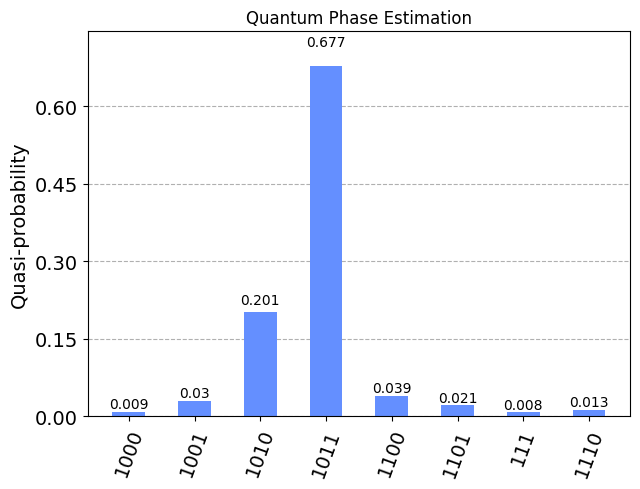

In [24]:
# Run a simulation with Sampler
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

shots = 1024

# ***With a short line of code***
# Sampler().run(qc).result().quasi_dists[0]
sampler = Sampler()
job = sampler.run(qpe, shots=shots)

# Get the result
result = job.result()
probabilities = result.quasi_dists[0]


# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(print("Total Shots", sum(counts.values()), ", Counts >>>", counts))


# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(probabilities)
print("----------------------------------------------------------------")

# Convert keys from decimal to binary
binary_key_counts = {format(key, '03b'): value for key, value in probabilities.items()}

# Filter out keys with a count less than 0.005 for better visibility
filtered_counts = {key: value for key, value in binary_key_counts.items() if value >= 0.005}

print("Binary Counts >>>", binary_key_counts)
print("----------------------------------------------------------------")
print("Filtered Counts >>>", filtered_counts)

# Plot the results
plot_histogram(filtered_counts, title="Quantum Phase Estimation")